# **Big Data Mining 2021-22 - Final Assignment** 
### **Instructions:**
* **Fill your ID Here:** 204767644
* Work on the assignment and submit your solution *individually*. <br> 
No sharing of information on the assignment is allowed between student. 


* **Format:** Fill code, text explanations and output (figures, tables ..) in the designated places. <br>For some questions, the code you fill should run in this .ipynb notebook and generate the output automatically after running (e.g. in `google colab`). <br>For others, you will need to run commands in other environments(e.g. unix) - in this case, just copy the commands and the relevant outputs in the designated text blocks. 
* Submit your filled solution by July 28th 23:59 your solution on moodle. 


* **Grading:** There are overall three questions. The number of points is shown for each question and sub-question. 
* **Note:** Points from your grade may be deducted for submitting wrong/missing parts of files OR if not submitting the complete generated/complied output.
* **Note:** Some parts of the code may take up to several hours to run.Be patient. However, don't leave everything to run at the last minute but prepare in advance so that your entire solution runs and finishes on time.
* **Good luck!**

## **Question 1: Build a Network by Web-Crawling [30pt]**

In this question we will build a network of web-pages that is part of the World-Wide-Web. This is a directed graph, where each node corresponds to a web-page, and each edge from node $a$ to node $b$ corresponds to an outgoing link from page $a$ to page $b$. 
To do so, we will run a web-crawler (a similar well known related concept is web-scraper), using the unix command `scrapy`. 
The web-crawler starts at a certain starting page, finds all outgoing hyperlinks, and goes to the corresponding pages. It then does the same for each outgoing page, recuresively. 

For example, suppose that we crawl the following network of webpages:

![WebExample](https://computersciencewiki.org/images/8/8b/Web_directed_graph.png)

and suppose that we start the crawler at the page called `"Networks"`. Then at the first step, the crawler will extract the webpages `"I teach at Univ. of X"` and `"Networks class blog"`. Next, it will also extract the webpages `"Univ. of X"`, `"Blog post about Company Z"` and `"Blog post about college rankings"`. The crawler will never extract the pages `"My song lyrics"` and `"I'm applying to college"`, no matter how long it will run.

**a. [6pt]** Clone the [PageRankScrapy](https://github.com/kod5kod/PageRankScrapy) repository from github to a local directory. <br>
Install the `scrapy` crawler using `pip install scrapy` in the unix command line. <br>
You may need to install additional software before like `pip` - follow the instructions in the Follow the `Readme` file of the `PageRankScrapy` for more details. 

After installation, run the `scrapy` command from the unix command line, to start at the wikipedia page: `https://en.wikipedia.org/wiki/Statistics`, and extract only pages that are connected from it and belong to the domain `https://en.wikipedia.org/wiki` (i.e. we restrict ourselves only to `wikipedia` pages with url starting at this string). Set the number of pages crawled to **one million**.  <br>
(**Hint:** You can copy the command available in the Readme file of the above repository, and change it to fullfil the question's instructions).

If successful, the `scrapy` command will fill two local files: 
1. `keyvalue` with the node IDs and names (page urls)
2. `transition` with link information: each line contains a node ID for a source page and the node IDs of all pages that can be reached from the source by a single hyperlink.

After finishing/stopping the crawler, display the first five lines of the `keyvalue` and `transition` output files. 


**Note:** The files are filled as the command is running, and running the crawler on the entire wikipedia may take too long. 
However, extracting the first **one million** distinct pages (nodes) should not take more than a couple of hours with a stable internet connection. <br>
The crawler may include many pages as nodes without their outgoing hyperlinks (edges). This is fine, we will just use the nodes and edges retrieved by the crawler as our network for further analysis.



**b. [6pt]** In unix, parse the resulting `transition` file to a file with the same information called `network`, but in which each line corresponds to a `single edge`, with two columns showing the IDs of the two corresponding nodes, such that for a directed edge $a \to b$ we have $a$ in the first column and $b$ in the second column. For example the line: <br>
4&nbsp;&nbsp;&nbsp;2,5,9

should be replaced by the following three lines:  
4&nbsp;2 <br>
4&nbsp;5 <br>
4&nbsp;9

For the resulting file, display the (ordered) pairs of urls corresponding to the first $10$ rows (edges). You will need to use also the `keyvalue` file.

**c. [6pt]** The web-crawler works by parsing the text of a webpage, finding all the (outgoing) hyperlinks, and adding them as directed edges before moving to the corrsponding pages. Suppose that a webpage $a$ has two or more *identical* hyperlinks, i.e. pointing to the *same* page. Will the crawler notice this and output only one edge, or will it display the target page twice or more? <br>
Write a unix command that checks using the file `transition` which of the two options is correct, and write your conclusion (we are just interested in `detection`. No need to change the file and remove multiple identical edges if there are any). 

**d. [12pt]** Compute and report basic statistics for the network, using unix commands. You may use for each statistic either the `transition` file format or the `network` file format, or both, as desired. 
1. Report the total number of nodes. What is the number of nodes with at least one outgoing edge? Does it match what you expected? <br>
2. What is the total number of (directed) edges (corresponding to hyperlinks) 
3. Compute the out-degree of each node, sort the nodes by their computed out-degree, and output the top 10 nodes with the highest out-degree (show both ID and url). <br>
&nbsp;&nbsp;**Note:** You may ignore here nodes with zero out-degree
4. Compute the in-degree of each node, sort the nodes by their computed in-degree, and output the top 10 nodes with the highest in-degree  (show both ID and url)


Write the commands that you use and the corresponding outputs in the designated **text** blocks below.

## **Question 1 Solutions:** <FillBelow>

a. Unix command/s for Web Crawling: <br>
```scrapy crawl pagerank -a start='https://en.wikipedia.org/wiki/statistics' -a domain='en.wikipedia.org/wiki' -a maxpages=1000000```

First 5 lines of resulting file: <br>
```
0	1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,0,446,447,448,449,450,451,452,453,454
40	455,456,457,458,459,460,461,462,463,464,465,50,51,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,387,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,233,535,250,536,537,538,539,241,240,235,540,236,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,442,556,557,445,40,447,448,449,450,451,452,453,454
1	442,2,558,0,559,560,561,445,1,447,448,449,450,451,452,453,454
44	562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,471,43,479,579,470,580,581,582,583,584,585,586,587,588,589,590,591,77,592,593,594,595,596,597,598,599,233,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,442,445,44,447,448,449,450,451,452,453,454
35	26,427,680,681,682,431,255,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,380,702,703,365,704,705,706,34,707,132,708,709,710,711,25,233,250,235,247,712,442,713,445,35,714,447,448,449,450,451,452,453,454
```

b. Unix command/s for parsing the file and converting to a networks format: <br>
```awk -F \t '{ n=split($2, a, ","); for (i=1; i<=n; i++) print $1, a[i] }' transition```

```
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
```


First 10 lines of resulting file, corresponding to first 10 edges <br>
```
https://en.wikipedia.org/wiki/Statistics https://en.wikipedia.org/wiki/Category:Statistics
https://en.wikipedia.org/wiki/Statistics https://en.wikipedia.org/wiki/Portal:Mathematics
https://en.wikipedia.org/wiki/Statistics https://en.wikipedia.org/wiki/Normal_distribution
https://en.wikipedia.org/wiki/Statistics https://en.wikipedia.org/wiki/Scatter_plot
https://en.wikipedia.org/wiki/Statistics https://en.wikipedia.org/wiki/Iris_flower_data_set
https://en.wikipedia.org/wiki/Statistics https://en.wikipedia.org/wiki/Data
https://en.wikipedia.org/wiki/Statistics https://en.wikipedia.org/wiki/Statistical_model
https://en.wikipedia.org/wiki/Statistics https://en.wikipedia.org/wiki/Statistical_survey
https://en.wikipedia.org/wiki/Statistics https://en.wikipedia.org/wiki/Experimental_design
https://en.wikipedia.org/wiki/Statistics  https://en.wikipedia.org/wiki/Census
```
c. Unix command/s for checking if there are non unique edges: <br>

```awk -F " " '{print $1"-"$2}' transition_long|sort -u|uniq -c|sort -r -k 1 | awk -F " " '{print $1}'|uniq -c ```

When I ran the aforementioned command, I first concatenate the first two columns from our long-format transition_long. 
Then i sorted the lines we will have an undirected graph.
If the network had duplicates, certain entries in this file should have duplicated.

The output is:
```
10901429 1
```

Conclusion: <br>
Consequently, all 10901429 rows in our count data have a count of exactly 1.
That means that the data in our original ling format network does not contain duplicates.

d. 
1. Commands for extracting numbers of nodes: <br>
`awk -F "\t" '{print $1}' transition | wc -l`<br>
Resulting numbers of nodes: <br>
`42990`

2. Command/s for extracting number of edges: <br>
`awk -F " " '{print $2}' transition_long | sort -n|uniq -c|awk -F " " '{print $2}'|wc -l` <br>
Resulting number of edges: <br>
`1002873`

3. Command/s for computing&sorting by out-degrees: <br>

```
awk -F " " '{print $1}' transition_long | uniq -c | sort -r -k 1 | head -n 10  >  outdgree_top_10

cat outdgree_top_10
count, ID
3837 101685
2907 22314
2660 601198
2313 126714
1972 19049
1918 43307
1910 669996
1910 48626
1803 253273
1803 253099
```

```
awk -F " " '{print "id_"$2}' outdgree_top_10 > outdgree_top_10_id
awk -F "\t" '{print "id_"$1, "\t", $2}' keyvalue > keyvalue_id
```


```
fgrep -w -f  top_10_outdgree_with_id keyvalue_with_id
```
<br>
Top 10 pages: <br>

```

id_19049 	 https://en.wikipedia.org/wiki/Chattel_slavery
id_22314 	 https://en.wikipedia.org/wiki/Alcohol_(drug)
id_43307 	 https://en.wikipedia.org/wiki/Satyajit_Ray
id_48626 	 https://en.wikipedia.org/wiki/LSD
id_101685 	 https://en.wikipedia.org/wiki/Ideological_politics
id_126714 	 https://en.wikipedia.org/wiki/Antioch
id_253099 	 https://en.wikipedia.org/wiki/Plov
id_253273 	 https://en.wikipedia.org/wiki/Pilaf
id_601198 	 https://en.wikipedia.org/wiki/List_of_comedians
id_669996 	 https://en.wikipedia.org/wiki/LSD_flashback

```

4. Command/s for computing&sorting by in-degrees: <br>

```
awk -F " " '{print $2}' transition_long | sort -n | uniq -c | sort -r -k 1 | head -n 10 > in_degree_top

cat in_degree_top
count, ID
9321 235
8689 588
8648 247
8189 554
7697 3460
7342 535
5623 586
5374 236
5228 6282
5222 250

awk -F " " '{print "id_"$2}' in_degree_top > top_indgree_with_id



grep -F -w -f top_indgree_with_id keyvalue_with_id

```

Top 10 pages: <br>
```
id_235 	 https://en.wikipedia.org/wiki/Doi_(identifier)
id_236 	 https://en.wikipedia.org/wiki/S2CID_(identifier)
id_247 	 https://en.wikipedia.org/wiki/ISSN_(identifier)
id_250 	 https://en.wikipedia.org/wiki/OCLC_(identifier)
id_535 	 https://en.wikipedia.org/wiki/Template:Cite_web
id_554 	 https://en.wikipedia.org/wiki/SUDOC_(identifier)
id_586 	 https://en.wikipedia.org/wiki/World_War_II
id_588 	 https://en.wikipedia.org/wiki/United_States
id_3460 	 https://en.wikipedia.org/wiki/The_New_York_Times
id_6282 	 https://en.wikipedia.org/wiki/Wikipedia:Link_rot
```

## **Question 2: Degrees, Communities, Clustering Coefficient, Random Networks  [34pt]** <br>

**a. [6pt]** Extract the DBLP collaboration network file `com-dblp.ungraph.txt`, and load it to the python notebook.  <br>
This **undirected** network describes collaboration between computer science authors, where each node corresponds to an author, and each edge corresponds to a joint publication of two authors. <br>
Compute and report the number of nodes, number of edges, number of triangles and global clustering coefficient of the network. <br>
The global clustering coefficient is defined [here](https://en.wikipedia.org/wiki/Clustering_coefficient), as 3 times the number of triangles, divided by the number of triplets, where a triplet is defined as a set of two edges ${(x,y),(x,z)}$ centered at a joint vertex $x$. Alternatively, a formula for the global clustering coefficient in terms of the adjacency matrix $E$ and the degrees vector $d$ is: 
$$
\frac{\sum_{i,j,k=1}^n e_{ij} e_{ik} e_{jk}}{\sum_{i=1}^n d_i(d_i-1)}
$$


**b. [6pt]** Compute the degree of every node in the network, and list the IDs of the five nodes (authors) with the highest degree. <br>
Next, compute and plot the `degree distribution` of the graph, i.e. the relative frequency $f_i$ (out of $n$) of nodes having degree $i$ for every $i$ from $0$ to the maximal degree. You should choose the type of plot that shows the degree distribution clearly.

**c. [6pt]** Simulate a random graph using the `Erdos-Renyi` model with the edge probability $p$ chosen such that the same number of nodes $n$ as the DBLP network, and such the `expected` number of overall edges in the simulated random graph is equal to the number of edges in the DBLP graph.
Compute and plot the degree distribution for the random graph in similar to (b.), either on the same or on separate plots. <br>
Is the `Erdos-Renyi` model a good generative model fro this graph, based on the degree distribution?

**d. [8pt]** Run the `asyn_lpa_communities` algorithm available in `networkx` for finding the community structure for the graph, implemented in the `networkx.algorithms.community` python module. Report the number of communities found.  <br>

Compare the division to communities found by the algorithm to the ground truth, given in the file `com-dblp.all.cmty.txt`, where each row corresponds to a cummunity. Report the [Adjusted Rand Index (ARI)](https://en.wikipedia.org/wiki/Rand_index#:~:text=The%20adjusted%20Rand%20index%20is,specified%20by%20a%20random%20model.). <br>
**Explanation:** ARI is an index that measures how well two partitions of the same set (e.g. two clustering results) agree with each other. For example ARI is equal to $1$ when the two partitions completely agree with each other, and is equal to approximately $0$ for two random partitions. A python implementation of ARI is available in `scikit-learn`.

**Note:** When you compare the communities found by our algorithm to the true communities, there are some issues that make the comparison non-ideal. <br>
There are missing labels you need to take care of. In particular, put all the nodes that appear in the graph but do not appear in any true community, in a new, separate community. 
Also, the true communities are overlapping, so some nodes may be present in more than one community. For simplicity, assign them to one of the communities at random.

**e. [8pt]** Draw $100$ random networks with the same degree distribution as the real DBLP network, but with edges between pairs of nodes drawn randomly, using the function `sample_random_graph_with_degree_seq` supplied to you, with at least $100,000$ iteration per random network. 
Start the randomization of each random network from the preious one. 
This implementation approximates sampling a graph from the 
[configuration model](https://en.wikipedia.org/wiki/Configuration_model) that is implemented in `networkx`, but is too slow and memory-consuming for our purposes. <br>
Compute the global clustering coefficient for each random network, and plot the empirical distribution of the $100$ clustering coefficients. How do they compare to the clustering coefficient of the real network computed in (a.)? 
Is the configuration model a good generative model for the network based on the clustering coefficient? <br>
Run also the community detection algorithm as in (d.) for **one** of the $100$ random networks. Report the number of communities and the ARI value with respect to the ground truth. How do these values compare to the values reported in (d.)? Are the results surprising?



Write the commands that you use in the designated **code** blocks below. <br>
The output should be generated automatically when running the .ipynb notebook (e.g. in `google colab`). <br> 
You may include additional text blocks with explanations and clarifications.

### a.

In [0]:
# Question 2 Solutions: 

# a. Code for reading the DBLP network here: 
import networkx as nx
from urllib.request import urlopen
import random
random.seed(42)

r = urlopen("https://raw.githubusercontent.com/yonatanlou/study_projects/main/BigDataMining/final_assignment/com-dblp.ungraph.txt")  
G = nx.read_edgelist(r, nodetype = int)

# Code to output the number of nodes, edges, triangles and clustering coefficient here: 
global_clustering_coeff = nx.transitivity(G)
print(f"Number of nodes: {G.number_of_nodes()}\nNumber of edges: {G.number_of_edges()}\nNumber of traingles: {sum(nx.triangles(G).values()) / 3}\nGlobal clustering coefficient: {global_clustering_coeff:.2%}")

Number of nodes: 317080
Number of edges: 1049866
Number of traingles: 2224385.0
Global clustering coefficient: 30.64%

### b.

Highest degree nodes:
Node: 38868, degree: 343

Node: 45479, degree: 296

Node: 57571, degree: 290

Node: 6737, degree: 269

Node: 72210, degree: 264

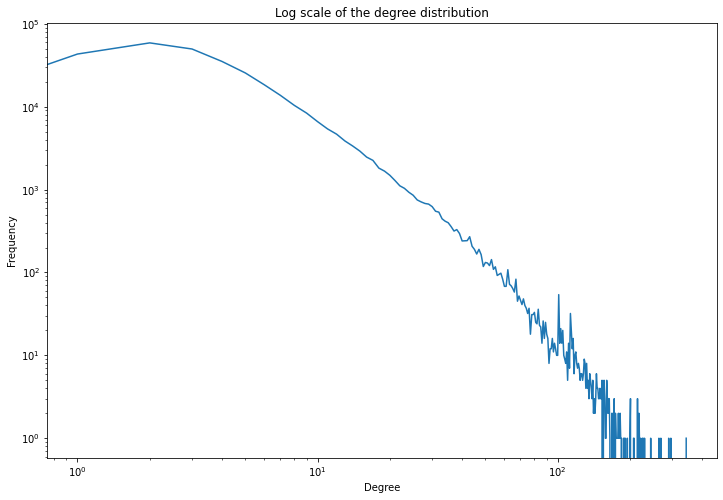

In [0]:
# b. Code for Computing and plotting the degree distribution, and for printing the top highest degree nodes: 
import matplotlib.pyplot as plt
import seaborn as sns

  

degree_freq = nx.degree_histogram(G)
degrees_continues = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
degree_freq = nx.degree_histogram(G)
degrees_continues = range(len(degree_freq))
plt.loglog(degrees_continues[:], degree_freq[:]) 
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title("Log scale of the degree distribution")
degrees = {node:val for (node, val) in G.degree()}
print("Highest degree nodes:")
for node, degree in sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:5]:
  print(f"Node: {node}, degree: {degree}\n")


### c.

Out[12]:

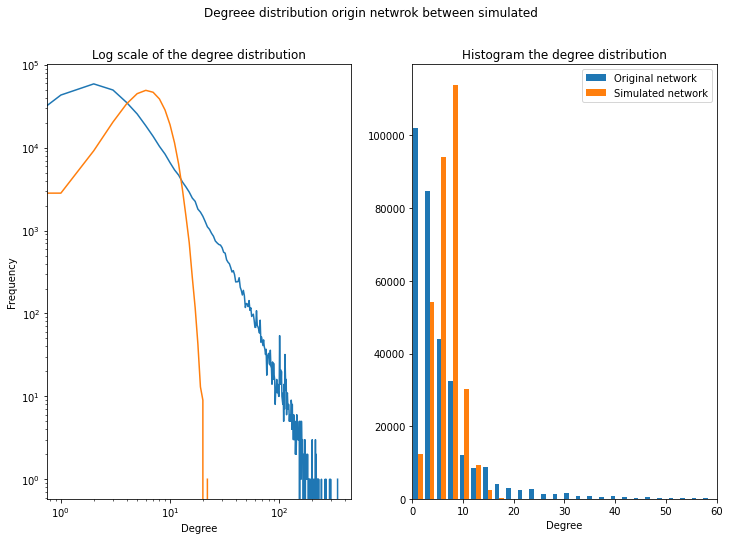

Text(0.5, 0, 'Degree')

In [0]:

# c. Simulation code for the Erdos-Renyi model
import numpy as np
n =  G.number_of_nodes()
p = (2*G.number_of_edges())/(n*(n-1))
G_sim = nx.random_graphs.fast_gnp_random_graph(int(len(degrees.keys())), p, seed=42)


# Code for Computing and plotting the degree distribution for the random graph: 
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 8))
fig.suptitle('Degreee distribution origin netwrok between simulated')


degree_freq = nx.degree_histogram(G)
degrees_continues = range(len(degree_freq))
ax1.loglog(degrees_continues[:], degree_freq[:]) 

degree_freq = nx.degree_histogram(G_sim)
degrees_continues = range(len(degree_freq))
ax1.loglog(degrees_continues[:], degree_freq[:]) 
ax1.set_title("Log scale of the degree distribution")
ax1.set_xlabel("Degree")
ax1.set_ylabel("Frequency")
degrees_G = [val for (node, val) in G.degree()]
degrees_G_sim = [val for (node, val) in G_sim.degree()]

d1 = np.array(degrees_G)
d2 = np.array(degrees_G_sim)

ax2.hist([d1, d2], label=["Original network","Simulated network"], bins=150)
ax2.legend(loc='upper right')
ax2.set_xlim(0,60)
ax2.set_title("Histogram the degree distribution")
ax2.set_xlabel("Degree")



Seems like the **Erdos-Renyi** is not that good generative model for this graph. The range of the degree distribution is clearly not the same, and the trend of the line is different. It seems like the Erdos-Reinty degree distribution have lower variance than the originial netwrok.
Moreover, when looking on the histogram plot - the distribution of the originial degrees seems like power law, and the simulated graph looks like a normal distribution (Which make sense to due to the fact that Binomial -> Poisson -> Normal when n is big).

### d.

In [0]:
# d. Run the community detection algorithm and report the resulting number of commuunities
from networkx.algorithms.community import asyn_lpa_communities
communities_q_d = sorted(asyn_lpa_communities(G, seed=42), key=len, reverse=True)
# Count the communities
print(f"The DBLP has {len(communities_q_d)} communities by the asyn_lpa_communities algorithm.")
communities_origin = communities_q_d.copy()


# Load the ground-trush communities and compute and report the ARI between the two
#Load the ground-trush communities
import urllib.request
url_ground_truth = "https://raw.githubusercontent.com/yonatanlou/study_projects/main/BigDataMining/final_assignment/com-dblp.all.cmty.txt"
data = urllib.request.urlopen(url_ground_truth)

true_communities = []
for line in data:
  line = line.decode("utf-8") 
  line = line.replace("\n", "")
  line = [int(node) for node in line.split("\t")]
  true_communities.append(line)
print(f"The real number of the DBLP communities is: {len(true_communities)}.")

true_nodes = set()
for community in true_communities:
  for node in community:
    true_nodes.add(node)

# put all the nodes that appear in the graph but do not appear in any true community, in a new, separate community.
rndm_community = []
clean_communities_pred = []
communities_q_d_list = [list(community) for community in communities_q_d]
for community in communities_q_d_list:
  clean_community = []
  for node in community:
    if node not in true_nodes:
      rndm_community.append(node)
    else:
      clean_community.append(node)
      
  if len(clean_community) > 0:
    clean_communities_pred.append(clean_community)
    
clean_communities_pred.append(list(rndm_community))

import pandas as pd
import numpy as np
def create_community_node_df(communities_list):
  nodes_list = []
  community_list = []
  for i, community in enumerate(communities_list):
    community_list.append([i]*len(community))
    nodes_list.append(community)
  nodes_list = [x for xs in nodes_list for x in xs]
  community_list = [x for xs in community_list for x in xs]
  communities_df = pd.DataFrame({"node":np.asarray(nodes_list).T, "community": np.asarray(community_list).T})
  return communities_df


#the true communities are overlapping, so some nodes may be present in more than one community. For simplicity, assign them to one of the communities at random
true_communities_df = create_community_node_df(true_communities)
origin_true_communities_df_size = true_communities_df.shape[0]
true_communities_df = true_communities_df.drop_duplicates(subset='node', keep="last")
true_communities_df.sort_values(by="node", inplace=True)
print(f"Removed {origin_true_communities_df_size-true_communities_df.shape[0]} nodes that had more than one community from the true communities nodes")

pred_communities_df = create_community_node_df(clean_communities_pred)
pred_communities_df = pred_communities_df.drop_duplicates(subset='node', keep="last")
pred_communities_df.sort_values(by="node", inplace=True)

print(f"removed {len(set(pred_communities_df.node).difference(set(true_communities_df.node)))} nodes from the origin DBLP communities that wasnt in the true communities nodes.")

df_merged = pd.merge(true_communities_df, pred_communities_df, how="right", on="node",suffixes=("_true", "_pred"))
max_community = int(df_merged.community_true.max())
df_merged.fillna(max_community+1, inplace=True)

from sklearn.metrics import adjusted_rand_score
ARI_score = adjusted_rand_score(df_merged["community_true"], df_merged["community_pred"])
print(f"The ARI scroe is {ARI_score:.2%}")

The DBLP has 46505 communities by the asyn_lpa_communities algorithm.
The real number of the DBLP communities is: 13477.
Removed 458822 nodes that had more than one community from the true communities nodes
removed 56082 nodes from the origin DBLP communities that wasnt in the true communities nodes.
The ARI scroe is 94.26%

Ive got a pretty high ARI. The process that had led to this high score, was to assign all the nodes that are in the real graph - but not in the true community, to a seperate community.
Before that ARI score was 0.8%! (~100 times less accurate).

### e.

Graph number 5 generated
Graph number 10 generated
Graph number 15 generated
Graph number 20 generated
Graph number 25 generated
Graph number 30 generated
Graph number 35 generated
Graph number 40 generated
Graph number 45 generated
Graph number 50 generated
Graph number 55 generated
Graph number 60 generated
Graph number 65 generated
Graph number 70 generated
Graph number 75 generated
Graph number 80 generated
Graph number 85 generated
Graph number 90 generated
Graph number 95 generated
Graph number 100 generated
The sampled graph from the 100 simulated graphs, have 46911 communities
The ARI scroe is 94.3858%

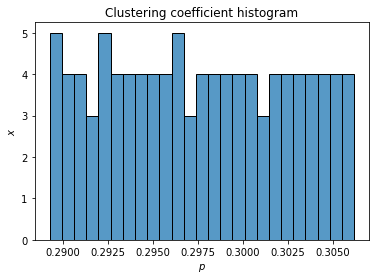

In [0]:
# e. Loop and generate 100 random networks, and compute the clustering coefficient for each one:
import random
import copy
SIMULATIONS_N = 100

def sample_random_graph_with_degree_seq(G, iters = 100000):
    G_rand = G # Note! we don't do deep copy here to save time. But the function can modify G. It is better to keep a separate copy of G outside the function
    edges = random.sample(list(G_rand.edges()), 2*iters)

    for i in range(0, iters, 2):
       if i%1000 == 0:
#            print("Run: ", i)  # you can turn off/on internal printing
        if edges[i] in G_rand.edges() and edges[i+1] in G_rand.edges() and len(set(edges[0] + edges[1])) == 4: # swap
            G_rand.remove_edges_from([edges[i], edges[i+1]])
            G_rand.add_edges_from([ (edges[i][0], edges[i+1][1]), (edges[i][1], edges[i+1][0])  ])

    return G_rand


current_G = G.copy()
global_clustering_coeffs = []
mean_clustering_coeffs = []
for i in range(1,SIMULATIONS_N+1):
  current_G = sample_random_graph_with_degree_seq(current_G)
  if i%5 == 0:
    print(f"Graph number {i} generated")
  #removeing selfloops
  current_G.remove_edges_from(nx.selfloop_edges(current_G))
  #multi edge to simple edge
  current_G = nx.Graph(current_G)
  global_clustering_coeffs.append(nx.transitivity(current_G))
  mean_clustering_coeffs.append(nx.average_clustering(current_G))

# Display the empirical distribution and compare to the clustering coefficient of the real network
import seaborn as sns
import numpy as np

global_clustering_coeffs = sorted(global_clustering_coeffs)
data = global_clustering_coeffs
data_sorted = np.sort(data)
p = 1. * np.arange(len(data)) / (len(data) - 1)

sns.histplot(data_sorted, bins=25)

plt.xlabel('$p$')
plt.ylabel('$x$')
plt.title("Clustering coefficient histogram")

# Run community detection for a random network and report the number of communities and ARI with the ground truth

communities_g_sim = sorted(asyn_lpa_communities(current_G), key=len, reverse=True)
print(f"The sampled graph from the {SIMULATIONS_N} simulated graphs, have {len(communities_g_sim)} communities")
# put all the nodes that appear in the graph but do not appear in any true community, in a new, separate community.
rndm_community = []
clean_communities_pred = []
communities_q_e_list = [list(community) for community in communities_g_sim]
for community in communities_q_e_list:
  clean_community = []
  for node in community:
    if node not in true_nodes:
      rndm_community.append(node)
    else:
      clean_community.append(node)
      
  if len(clean_community) > 0:
    clean_communities_pred.append(clean_community)
    
clean_communities_pred.append(list(rndm_community))

pred_communities_df = create_community_node_df(clean_communities_pred)
pred_communities_df = pred_communities_df.drop_duplicates(subset='node', keep="last")
pred_communities_df.sort_values(by="node", inplace=True)

df_merged = pd.merge(true_communities_df, pred_communities_df, how="right", on="node",suffixes=("_true", "_pred"))
max_community = int(df_merged.community_true.max())
df_merged.fillna(max_community+1, inplace=True)

from sklearn.metrics import adjusted_rand_score
ARI_score_2 = adjusted_rand_score(df_merged["community_true"], df_merged["community_pred"])
print(f"The ARI scroe is {ARI_score_2:.4%}")

In [0]:
print(f"The global clustering coeefiecient of the real network is {global_clustering_coeff:.4%}")
print(f"While the global clustering coeefiecient of the simulated networks is {data_sorted.mean():.4%}\n")

print(f"The average clustering coeefiecient of the real network is {nx.average_clustering(G):.4%}")
print(f"While the average clustering coeefiecient of the simulated networks is {nx.average_clustering(current_G):.4%}\n")

print(f"The ARI score for the original data is {ARI_score:.4%}, while the ARI score with generated data is {ARI_score_2:.4%}")

The global clustering coeefiecient of the real network is 30.6377%
While the global clustering coeefiecient of the simulated networks is 29.7595%

The average clustering coeefiecient of the real network is 63.2431%
While the average clustering coeefiecient of the simulated networks is 59.7518%

The ARI score for the original data is 94.2571%, while the ARI score with generated data is 94.3858%

There are two main approaches for the **global clustering coefficient** formula is: 
1. \\(\frac{3*NumberOfTraingles}{NumOfTripltes}\\). (stated by Newman, Watts and Strogatz in Random graph models of social networks, Proceedings of the National Academy of Science of the United States of America).

2. \\(\frac{\sum_{i,j,k=1}^n e_{ij} e_{ik} e_{jk}}{\sum_{i=1}^n d_i(d_i-1)}\\). (stated by Duncan J. Watts and Steven H. Strogatz. Collective dynamics of “small-world” networks, Nature)

The expected **global clustering coefficient** for a simulated network should be converge to the real **global clustering coefficient**.
Proof can be found in here (too long for here): [Estimating Clustering Coefficients and Size of Social
Networks via Random Walk](http://www.cs.technion.ac.il/~lirank/pubs/2013-www-Estimating-Clustering-Coefficients-and-Size-of-Social-Networks-via-Random-Walk.pdf) (S.J Hardiman, L Katzier, ACM transition on the Web, 2013).

And indeed we can see that the **global clustering coefficient** is almost the same.

The **ARI** score is very similiar to the ARI score we got in section d. This is a bit suprising due to the fact that the clustering ciefficient is way different from the original network, and the random graph is not the same. But when we compare the degree distribution of the original graph and the random graph - it extacly the same (this is how the Erdos reiny model works). This could explain the almost identical ARI score.

**Not relevant (relevant for average clustering coeff)** \
(I thought that you want us to explain about the average clustering coefficient - I researched the topic a lot and didnt want to remove this part)

For undirected networks, the clustering coefficient calculates the connectivity of each node \\(i's\\) neighbors. We calculate the clustering coefficient as for node I with degree k as \\(\frac{2e_i}{k_i(k_i-1)}\\) where \\(e_i\\) is the number of edges between the neighbors of node i.\
Edges in the Erdos Reiny model are IID with probability p, so the expected \\(e_i\\) for the random graph is: \\(E[e_i] = p\frac{k_i(k_i-1)}{2}\\).
This is so because each pair of different neighbors of node i of degree k is connected with a probability of p, and \\\frac{k_i(k_i-1)}{2}\\) is the number of those pairs.\
If so, the anticipated clustering coefficient is \\(E[C_i] = \frac{p*k_i(k_i-1)}{k_i(k_i-1)}=p=\frac{\bar{k}}{n-1}\approx\frac{\bar{k}}{n}\\) where \\(\bar{k}\\) is the average degree. We can clearely see that the clustering coeffiecient of the random graph is significant smaller. \
We can think of it rationally too. The original graph have very large clustering coeffiecinet - that means that probabilty for connection between each scholar and another is pretty high, and can also suggest to us that the collaboration between scholars **is not random**. When we random a new graph with the erdos reiny model we assume randomness.\